<a href="https://colab.research.google.com/github/Razor1889/Machine-Learning-on-Diverse-Datasets/blob/main/(MAIN)_Term_Project_First_Case_Categorial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Comparative Evaluation of Machine Learning Techniques on Diverse Dataset Types

The base ideology behind this project is referenced from Data Professor.
[Link to his Channel](https://www.youtube.com/@DataProfessor/featured)

### Introduction of the Process and the First Dataset

We will start the project by loading a dataset. The first dataset used is compiled by Data Professor based on the chracteristation of individual flower species within their genus *Iris*. The resulting chracterisation depends on the four input variables being the sepal length and width, and the petal length and width.

In [ ]:
#Read in Data.
import pandas as pd
import IPython
import timeit
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The data read is broken down into 4 characteristic columns and 1 resulting species column.
We will now separate the data set such that we have an array of characteristics and a vector of resulting species.
In the form of y = F(x). Where we can create a machine learning program F such that,
it can take in input array x and output a predictive y.

In [ ]:
#Split the table such that we have y = F(x).
#Isolate the result.
y = df['Species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
#By dropping the Species column, we have isolated the rest of the table.
x = df.drop('Species', axis=1)
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now that we have the data, we can then split the data into a 80-20 test train set, which is the first model training strategy. This strategy, along with others introduced in this project, are made possible by scikit and their model training utilities.

### 80-20 Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
#We then create a training and testing split of 0.2 to the dataset (meaning we only train the 0.8 and test on the 0.2).
#The random state is selected to be 100. What is the random state? It is simply a seed value sent to a randomness generator.
#This generator shuffles the set before splitting it.
#By keeping the random state seed value at a constant (i.e 100) we ensure that if we reproduce this test,
#we will get the same result, making it easier to reproduce tests and maintain consistency.

In [ ]:
%%timeit -n 100
#Efficiency Analysis !!!ALWAYS RUN TIMEIT AS FIRST LINE IN CELL!!!
train_test_split(x, y, test_size=0.2, random_state=100)

785 µs ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#x_train
#Our train set has 80% of the 150 records.
#Note the shuffling of the data with seed 100, by looking at the record numbers in the leftmost column.

In [ ]:
#x_test
#Our test set has the other 20%.

### Training the Model

In [ ]:
#We then perform linear regression, however, since our y data has string values, we need to encode the values
#such that they have numerical assignments to each category of species.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
#Create a linear regression model and provide the training data
lr = LinearRegression()
lr.fit(x_train, y_train)
#lr.fit trains the data

LinearRegression()

In [ ]:
%%timeit -n 100
#Testing Training Time
lr.fit(x_train, y_train)

1.86 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
y_train
#Note that we have representations of 0,1,2 which represent the three possible classifications of species;
#virginica, versicolor, setosa

array([1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [ ]:
#We then use the model (F) to predict the y values based on the x data.
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
%%timeit -n 100
#Testing Predicting Time
lr.predict(x_train)

929 µs ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit -n 100
#Testing Predicting Time
lr.predict(x_test)

932 µs ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#80% of the data (trained)
y_lr_train_pred

array([ 9.34420438e-01,  1.15668126e+00,  1.48647990e+00, -8.35187957e-02,
       -4.18459712e-02,  1.27475417e+00, -5.72695640e-02,  1.17111089e+00,
        2.04533953e+00,  2.01565930e+00,  8.17920506e-02,  1.19673661e+00,
        1.88947412e+00,  2.12171305e+00, -7.63372421e-02,  2.66981600e-02,
        1.70687914e-03,  4.32077524e-02,  1.07900760e+00, -7.63372421e-02,
        1.71655780e-01, -1.01008953e-01,  1.31307345e+00,  1.82082351e+00,
        1.58016071e+00,  1.37877014e+00,  1.72004330e+00,  1.17301891e+00,
        2.02364620e+00,  1.69302659e+00,  1.05021487e+00, -1.34425151e-01,
        1.78873282e+00,  1.86228547e+00,  1.44421155e+00, -1.63934464e-01,
       -2.35072403e-02,  1.72984945e+00,  4.84147717e-02, -1.42906839e-01,
        2.04199073e-01,  1.32546202e+00,  1.98025294e+00,  2.09591538e+00,
        1.52939727e+00, -1.01075469e-01,  1.35733091e+00,  1.56345261e+00,
        9.53850008e-03,  1.27232808e+00,  8.99096222e-01,  1.56089452e+00,
       -8.37173022e-02,  

In [ ]:
#20% of the data (testing)
y_lr_test_pred

array([ 1.89832627, -0.00489112,  2.20191459, -0.05532159,  1.58053116,
        1.99648292, -0.16608095, -0.0342674 ,  1.67892747,  0.03329616,
       -0.03871892,  1.92253549,  0.09361166, -0.08664585,  1.88495713,
        1.14980365,  0.96879065,  1.48938189,  1.96910669,  1.82668164,
        1.71520569,  0.03442212,  1.67395892,  0.01672005,  1.02257466,
        1.64360325,  1.18792442, -0.03726246,  1.19704055,  1.96701579])

So far, what we have done is implement F using linear regression. We then predicted y using F on the 2 data sets.

### Comparing Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#We will now test the model performance evaluating the mean squared error.
#and r2 score of the models.
#The r2 score measures how well the independent variables (x) explain the variability of the dependent variable (y).
#train set:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#test set:
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(' Train set MSE:',lr_train_mse, '\n',
'Train set r2:',lr_train_r2, '\n',
'Test set MSE:',lr_test_mse, '\n',
'Test set r2:',lr_test_r2)

 Train set MSE: 0.049166937863482064 
 Train set r2: 0.9223339287808093 
 Test set MSE: 0.036234680547680725 
 Test set r2: 0.9544536138367142


### Data Visualisation

Text(0.5, 0, 'Experimental Species')

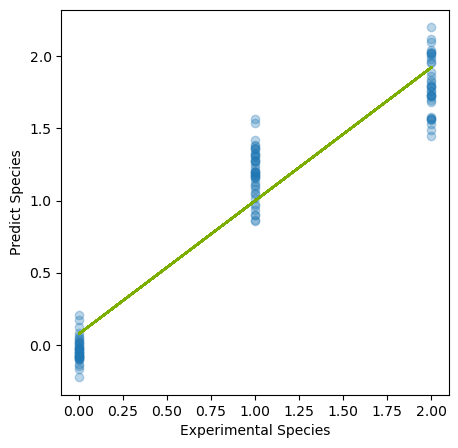

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#7CAE00')
plt.ylabel('Predict Species')
plt.xlabel('Experimental Species')

### Conclusion and Analysis

Here we can see that our experimental (dataset values) species are concentrated around 0,1,2 representing the three classifications. We can then see that our experimental species values attempt to create a line of best fit to model the data.
It is imperitive to understand that using linear regression in a dataset with categorial outputs is not the best choice. As such, the results of the 80-20 train and test strategy does not yield fruitful results for this type of dataset. It is also improtant to understand that, as we increase the amount of segmentation within the data, we increase the predictive model efficiency for categorial data, but inversely affect the efficiency for numerical data. This can be examined further as we move onto the cross-validation strategy.